In [220]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# get data from web scraping

In [221]:
df = pd.read_csv('Best_Books_Ever.csv')

In [222]:
df.head()

,title,author,published_date,rating,rating_n,review_n,introduction,genre,page,books_written_n,author_followers,link
0,The Hunger Games,Suzanne Collins,"First published September 14, 2008",4.33,"7,938,345 ratings","195,436 reviews","Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","374 pages, Hardcover",49,93k,https://www.goodreads.com/book/show/2767052-th...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,"First published June 21, 2003",4.50,"3,138,144 ratings","56,851 reviews",Harry Potter is about to start his fifth year ...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","912 pages, Paperback",562,221k,https://www.goodreads.com/book/show/2.Harry_Po...
2,Pride and Prejudice,Jane Austen,"First published January 28, 1813",4.28,"3,930,925 ratings","99,795 reviews","Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...","279 pages, Paperback","3,939",62.1k,https://www.goodreads.com/book/show/1885.Pride...
3,To Kill a Mockingbird,Harper Lee,"First published January 1, 1960",4.27,"5,675,438 ratings","109,843 reviews",The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...","336 pages, Paperback",69,12.9k,https://www.goodreads.com/book/show/2657.To_Ki...
4,The Book Thief,Markus Zusak,"First published March 1, 2006",4.39,"2,357,114 ratings","135,561 reviews",Librarian's note: An alternate cover edition c...,"['Historical Fiction', 'Fiction', 'Young Adult...","552 pages, Hardcover",27,38.1k,https://www.goodreads.com/book/show/19063.The_...


# data cleaning

In [223]:
df.shape

(8899, 12)

In [224]:
df.dtypes

title                object
author               object
published_date       object
rating              float64
rating_n             object
review_n             object
introduction         object
genre                object
page                 object
books_written_n      object
author_followers     object
link                 object
dtype: object

### NaN value

In [225]:
df.isna().sum()

title                61
author               61
published_date       94
rating               61
rating_n             61
review_n             61
introduction        101
genre                61
page                 77
books_written_n      62
author_followers     82
link                  0
dtype: int64

In [226]:
df[df['title'].isna()].head()

,title,author,published_date,rating,rating_n,review_n,introduction,genre,page,books_written_n,author_followers,link
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/39280444-s...
1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/13089710-t...
1505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/56060300-h...
1530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/20698530-p...
1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/12875258-t...


In [227]:
df = df.dropna(subset=['title'])

In [228]:
df.isna().sum()

title                0
author               0
published_date      33
rating               0
rating_n             0
review_n             0
introduction        40
genre                0
page                16
books_written_n      1
author_followers    21
link                 0
dtype: int64

In [229]:
df.shape

(8838, 12)

#### deal with publieshed_date

In [230]:
df['published_date'] = df['published_date'].str.split('shed',expand=True)[1]

In [231]:
df['published_date'].str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,,September,"14,",2008,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,,June,"21,",2003,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,,January,"28,",1813,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,,January,"1,",1960,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,,March,"1,",2006,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8894,,October,"15,",2013,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8895,,November,"19,",2014,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8896,,October,"14,",2014,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8897,,November,"1,",2018,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [232]:
# Create a new column for year
df['published_year'] = df['published_date'].str.split(' ', expand=True)[3]
df['published_year'] = pd.to_numeric(df['published_year'], errors='coerce')

# Create a new column for month
df['published_month'] = df['published_date'].str.split(' ', expand=True)[1]

month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['published_month'] = df['published_month'].fillna('0').map(month_dict)

# Create a new column for day
df['published_day'] = df['published_date'].str.split(' ', expand=True)[2]
df['published_day'] = df['published_day'].str.rstrip(',')
df['published_day'] = pd.to_numeric(df['published_day'], errors='coerce')

In [233]:
df.isna().sum()

title                 0
author                0
published_date      335
rating                0
rating_n              0
review_n              0
introduction         40
genre                 0
page                 16
books_written_n       1
author_followers     21
link                  0
published_year      342
published_month     342
published_day       341
dtype: int64

In [234]:
df['published_year'].value_counts(dropna=False)

2013.0    440
2012.0    439
2011.0    393
2010.0    346
NaN       342
         ... 
1767.0      1
1818.0      1
8.0         1
900.0       1
60.0        1
Name: published_year, Length: 326, dtype: int64

In [235]:
# Replace NAN with average 1980
df['published_year'] = df['published_year'].fillna(np.ceil(np.mean(df['published_year']))).astype(int)

In [236]:
def modify_published_year(x):
    if x < 24:
        return x + 2000
    elif x < 1000:
        return x + 1000
    else:
        return x

df['published_year'] = df['published_year'].apply(modify_published_year)

In [237]:
df['published_month'].value_counts(dropna=False)

1.0     2914
10.0     685
9.0      684
5.0      576
4.0      562
8.0      533
3.0      502
6.0      481
11.0     456
2.0      411
7.0      370
NaN      342
12.0     322
Name: published_month, dtype: int64

In [238]:
# Replace NAN with 0
df['published_month'] = df['published_month'].fillna(0).astype(int)
df['published_day'] = df['published_day'].fillna(0).astype(int)

In [239]:
df = df.drop('published_date', axis=1)

#### deal with rating_n, review_n

In [240]:
df['rating_n'] = df['rating_n'].str.split('r',expand=True)[0]
df['rating_n'] = df['rating_n'].fillna('0').str.replace(',', '').astype(int)

In [241]:
df['review_n'] = df['review_n'].str.split('r',expand=True)[0]
df['review_n'] = df['review_n'].fillna('0').str.replace(',', '').astype(int)

#### deal with author_followers

In [242]:
# Replace NAN with average 27897
df['author_followers'] = df['author_followers'].fillna(27897).astype(str).str.replace('follower', '')

In [243]:
for i, x in enumerate(df['author_followers']):
    x_str = str(x)  
    if 'k' in x_str:
        if '.' in x_str:
            df.at[i, 'author_followers'] = int(float(x_str.replace('k', '').replace(',', '').replace('.', '')) * 100)
        else:
            df.at[i, 'author_followers'] = int(x_str.replace('k', '').replace(',', '')) * 1000
    else:
        df.at[i, 'author_followers'] = int(x_str.replace(',', ''))

In [244]:
for i, x in enumerate(df['author_followers']):
    x_str = str(x)  
    if 'k' in x_str:
        if '.' in x_str:
            df.at[i, 'author_followers'] = int(float(x_str.replace('k', '').replace(',', '').replace('.', '')) * 100)
        else:
            df.at[i, 'author_followers'] = int(x_str.replace('k', '').replace(',', '')) * 1000
    else:
        df.at[i, 'author_followers'] = int(x_str.replace(',', ''))
df['author_followers'] = df['author_followers'].astype(int)  

In [245]:
np.mean(df['author_followers'])

27957.292617147996

In [246]:
df = df.dropna(subset=['title'])

In [247]:
df['rating_n'] = df['rating_n'].astype(int)
df['review_n'] = df['review_n'].astype(int)
df['published_month'] = df['published_month'].astype(int)
df['published_day'] = df['published_day'].astype(int)
df['published_year'] = df['published_year'].astype(int)

#### deal with page

In [248]:
df['pages'] = df['page'].str.split('pages,', expand=True)[0]
df['bookformat'] = df['page'].str.split('pages,', expand=True)[1]

In [249]:
# Replace NAN with average 362
df['pages'] = pd.to_numeric(df['pages'], errors='coerce').fillna(362)

In [250]:
df['pages'] = df['pages'].astype(int)

In [251]:
np.mean(df['pages'])

381.0168590178773

In [252]:
df['bookformat'] = df['bookformat'].fillna('other')

In [253]:
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("None", "other"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("MP3 CD", "Audiobook"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Trade Paperback", "Paperback"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Slipcased Hardcover", "Hardcover"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("hardcover", "Hardcover"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Audible Audio", "Audiobook"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Audio CD", "Audiobook"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Mass Market Paperback", "Paperback"))
df['bookformat'] = df['bookformat'].apply(lambda x: x.replace("Kindle Edition", "Kindle"))

In [254]:
data = pd.DataFrame(df['bookformat'].value_counts()).reset_index()

data.columns = ['format', 'counts']
other_format = list(data[data['counts']<20]['format'])

def clean_format(x):
    if x in other_format:
        return 'other'
    else:
        return x    

In [255]:
df['bookformat'] = list(map(clean_format, df['bookformat']))

In [256]:
df['bookformat'].value_counts()

 Paperback    4785
 Hardcover    2529
 Kindle        731
other          509
 ebook         263
 Audiobook      21
Name: bookformat, dtype: int64

In [257]:
df = df.drop('page', axis=1)

#### deal with books_written_n 

In [258]:
df['books_written_n'] = df['books_written_n'].str.replace(',', '')
df['books_written_n'] = df['books_written_n'].str.replace("14.6k", "14600", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("14.2k", "14200", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("243k", "243000", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("778k", "778000", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("11.9k", "11900", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("780k", "780000", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("12k", "12000", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("14.1k", "14100", regex=True)
df['books_written_n'] = df['books_written_n'].str.replace("242k", "242000", regex=True)

In [259]:
df[df['books_written_n'].isna()]

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,published_year,published_month,published_day,pages,bookformat
3213,If We Were Villains,M. L Rio (author),4.22,165312,31392,Oliver Marks has just served ten years for a m...,"['Mystery', 'Fiction', 'Thriller', 'Contempora...",NaN,1409,https://www.goodreads.com/book/show/34369803-i...,2017,4,11,432,Paperback


In [260]:
# from the link, found the author has written 2 books
df['books_written_n'] = df['books_written_n'].fillna(2)

In [261]:
df['books_written_n'] = pd.to_numeric(df['books_written_n'])
df['books_written_n'] = df['books_written_n'].astype(int)

In [262]:
df['books_written_n'].value_counts(dropna=False)

14      121
11      119
6       117
2       111
7       107
       ... 
7124      1
1387      1
1141      1
3454      1
564       1
Name: books_written_n, Length: 964, dtype: int64

#### deal with introduction

In [263]:
df['introduction'] = df['introduction'].fillna('unknown')

#### deal with genre

In [264]:
df['genre'].value_counts(dropna=False)

[]                                                                                                     124
['Fiction']                                                                                             14
['Fantasy']                                                                                             13
['Vampires', 'Young Adult', 'Paranormal', 'Fantasy', 'Urban Fantasy', 'Romance', 'Supernatural']        12
['Fantasy', 'Fiction', 'Young Adult', 'Childrens', 'Animals', 'Adventure', 'Middle Grade']              12
                                                                                                      ... 
['Fantasy', 'Young Adult', 'Magic', 'Urban Fantasy', 'Fiction', 'Mystery', 'Adventure']                  1
['Thriller', 'Mystery', 'Fiction', 'Crime', 'Mystery Thriller', 'Suspense', 'Canada']                    1
['Epic', 'Drama', 'Novels', 'Contemporary', 'Fiction']                                                   1
['Plays', 'Classics', 'France', 'Dram

In [265]:
df['genre'] = df['genre'].apply(lambda x: x.replace("[]", "unknown"))

In [266]:
df['genre'] = df['genre'].str.replace('[', '')
df['genre'] = df['genre'].str.replace(']', '')
df['genre'] = df['genre'].str.replace("'", '')

C:\Users\jiaxing\AppData\Local\Temp\ipykernel_6124\872279065.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genre'] = df['genre'].str.replace('[', '')
C:\Users\jiaxing\AppData\Local\Temp\ipykernel_6124\872279065.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genre'] = df['genre'].str.replace(']', '')


In [267]:
df['genre'].value_counts()

unknown                                                                                124
Fiction                                                                                 14
Fantasy                                                                                 13
Vampires, Young Adult, Paranormal, Fantasy, Urban Fantasy, Romance, Supernatural        12
Fantasy, Fiction, Young Adult, Childrens, Animals, Adventure, Middle Grade              12
                                                                                      ... 
Fantasy, Young Adult, Magic, Urban Fantasy, Fiction, Mystery, Adventure                  1
Thriller, Mystery, Fiction, Crime, Mystery Thriller, Suspense, Canada                    1
Epic, Drama, Novels, Contemporary, Fiction                                               1
Plays, Classics, France, Drama, Fiction, Theatre, French Literature                      1
Young Adult, Fantasy, Romance, Paranormal, Ghosts, Supernatural, Paranormal Romance      1

In [268]:
genres = df['genre'].str.split(",",expand = True)
df = pd.concat([df, genres], axis=1)

In [269]:
df = df.rename(columns={0:'genre1',1:'genre2', 2:'genre3',3:'genre4',4:'genre5',5:'genre6',6:'genre7'})
df.head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,published_day,pages,bookformat,genre1,genre2,genre3,genre4,genre5,genre6,genre7
0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,https://www.goodreads.com/book/show/2767052-th...,...,14,374,Hardcover,Young Adult,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,https://www.goodreads.com/book/show/2.Harry_Po...,...,21,912,Paperback,Fantasy,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure
2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,https://www.goodreads.com/book/show/1885.Pride...,...,28,279,Paperback,Classics,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook
3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,https://www.goodreads.com/book/show/2657.To_Ki...,...,1,336,Paperback,Classics,Fiction,Historical Fiction,School,Literature,Young Adult,Historical
4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,https://www.goodreads.com/book/show/19063.The_...,...,1,552,Hardcover,Historical Fiction,Fiction,Young Adult,Historical,Classics,War,World War II


### check again

#### check link if has duplicate books

In [270]:
df['link'].value_counts(dropna=False)

https://www.goodreads.com/book/show/2767052-the-hunger-games                                          1
https://www.goodreads.com/book/show/17171909-brilliance                                               1
https://www.goodreads.com/book/show/18775297-sweet-filthy-boy                                         1
https://www.goodreads.com/book/show/18079527-the-impossible-knife-of-memory                           1
https://www.goodreads.com/book/show/632901.What_Matters_Most_is_How_Well_You_Walk_Through_the_Fire    1
                                                                                                     ..
https://www.goodreads.com/book/show/199786.Ninth_Key                                                  1
https://www.goodreads.com/book/show/99208.The_Monkey_Wrench_Gang                                      1
https://www.goodreads.com/book/show/13925.Child_of_the_Prophecy                                       1
https://www.goodreads.com/book/show/13588356-daring-greatly     

In [271]:
df.isna().sum()

title                 0
author                0
rating                0
rating_n              0
review_n              0
introduction          0
genre                 0
books_written_n       0
author_followers      0
link                  0
published_year        0
published_month       0
published_day         0
pages                 0
bookformat            0
genre1                0
genre2              203
genre3              264
genre4              318
genre5              371
genre6              445
genre7              488
dtype: int64

In [272]:
df.dtypes

title                object
author               object
rating              float64
rating_n              int32
review_n              int32
introduction         object
genre                object
books_written_n       int32
author_followers      int32
link                 object
published_year        int32
published_month       int32
published_day         int32
pages                 int32
bookformat           object
genre1               object
genre2               object
genre3               object
genre4               object
genre5               object
genre6               object
genre7               object
dtype: object

In [273]:
#Find the duplicates

df.duplicated().sum()

0

### Add a column for ranking

In [274]:
df = df.reset_index()
df['Rank'] = df.index + 1
df = df.drop('index', axis=1)

In [275]:
df.head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,pages,bookformat,genre1,genre2,genre3,genre4,genre5,genre6,genre7,Rank
0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,https://www.goodreads.com/book/show/2767052-th...,...,374,Hardcover,Young Adult,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure,1
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,https://www.goodreads.com/book/show/2.Harry_Po...,...,912,Paperback,Fantasy,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure,2
2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,https://www.goodreads.com/book/show/1885.Pride...,...,279,Paperback,Classics,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook,3
3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,https://www.goodreads.com/book/show/2657.To_Ki...,...,336,Paperback,Classics,Fiction,Historical Fiction,School,Literature,Young Adult,Historical,4
4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,https://www.goodreads.com/book/show/19063.The_...,...,552,Hardcover,Historical Fiction,Fiction,Young Adult,Historical,Classics,War,World War II,5


# Visualization

### 1.author

In [276]:
data_author = pd.DataFrame(df['author'].value_counts()).reset_index()
data_author.columns = ['author', 'counts']
data_author

,author,counts
0,Stephen King,56
1,Terry Pratchett,37
2,William Shakespeare,33
3,Rick Riordan,33
4,James Patterson,29
...,...,...
4089,Onyeka,1
4090,Taylor Ann Bunker,1
4091,Nikki Moyes,1
4092,Robert Marasco,1


In [277]:
data_author['counts'].mean()

2.1587689301416706

In [278]:
data_author['counts'].median()

1.0

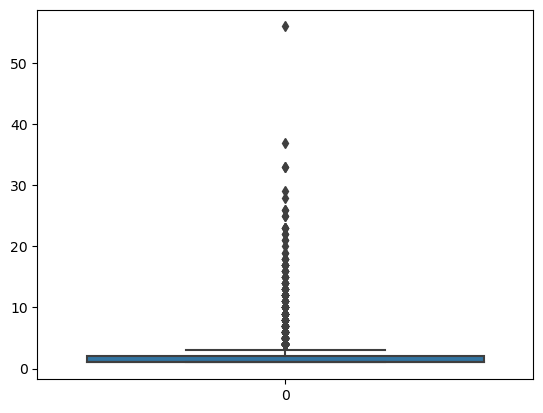

In [279]:
sns.boxplot(data=data_author['counts'])
plt.show()

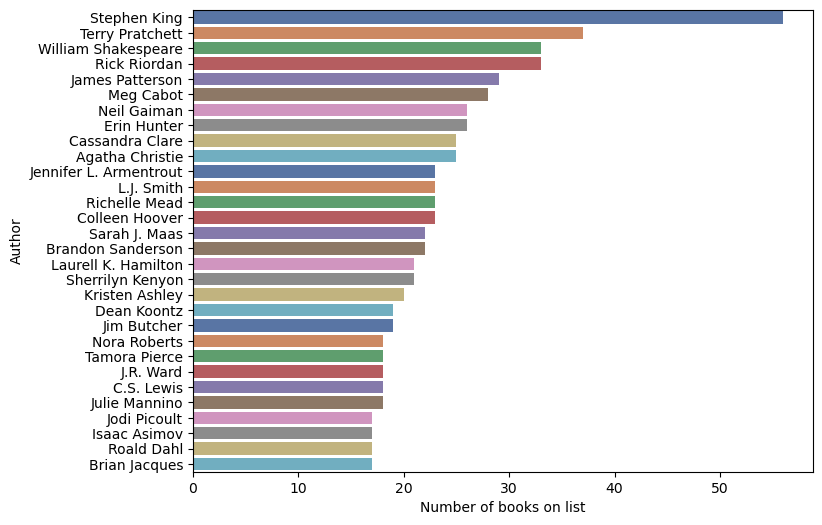

In [280]:
aut = df['author'].value_counts()[:30]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, x=aut, y=aut.index, palette='deep')
plt.xlabel('Number of books on list')
plt.ylabel('Author')
plt.show()

#### - On the Best_Books_Ever list, the most written books is Stephen King, with 56 books on the list.
#### - Ranked in the top 30 counts, all authors have more than 15 books on the Best_Books_Ever list.
#### - Most authors still have only one book on the Best_Books_Ever list.

### 2.books_written_n: How many books has this author written.

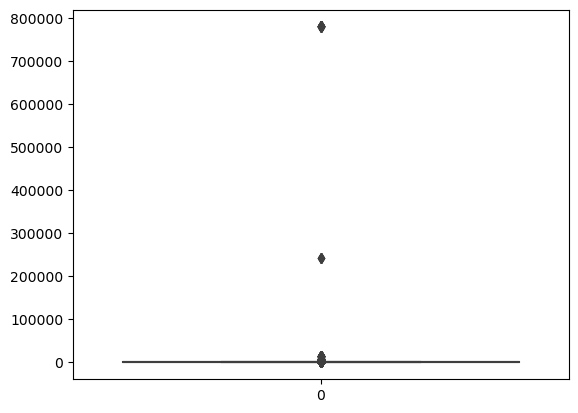

In [281]:
sns.boxplot(data=df['books_written_n'])
plt.show()

In [282]:
df['books_written_n'].mean()

1999.877347816248

In [283]:
df['books_written_n'].median()

81.0

In [284]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(df['books_written_n'],75) - np.nanpercentile(df['books_written_n'],25)
upper_limit = np.nanpercentile(df['books_written_n'],75) + 1.5*iqr
print(upper_limit)
extraordinary_points = df[df['books_written_n']>1000]
len(extraordinary_points)  # This checks the number of points that will be removed

542.0


768

In [285]:
#dropp the 'books_written_n' bigger than 1000, to see the plot more clear
df_dropped = df[df['books_written_n'] <=1000].copy()

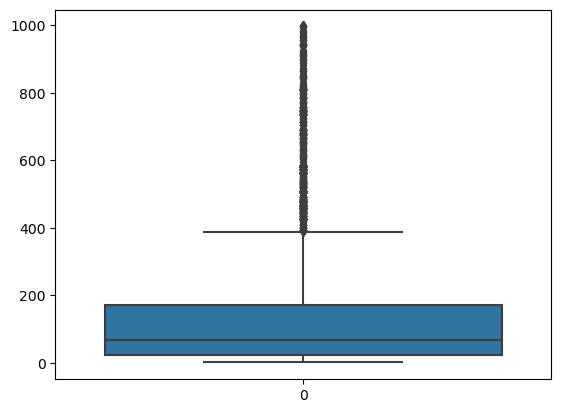

In [286]:
sns.boxplot(data=df_dropped['books_written_n'])
plt.show()

#### - After removing the 768 authors with more than 1,000 books, we can see that there are still 25% of authors with over 400 books. Most authors have less than 200 books.
#### - The median is 81, which means that more than half of the authors,who on the Best_Books_Ever list have 81 books.

In [287]:
# Is there really someone who has written more than 10,000 books?
df[df['books_written_n']>10000].head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,pages,bookformat,genre1,genre2,genre3,genre4,genre5,genre6,genre7,Rank
27,Romeo and Juliet,William Shakespeare,3.74,2463272,27404,"In Romeo and Juliet, Shakespeare creates a vio...","Classics, Plays, Fiction, Romance, School, Dra...",14200,41400,https://www.goodreads.com/book/show/18135.Rome...,...,281,Paperback,Classics,Plays,Fiction,Romance,School,Drama,Read For School,28
174,A Midsummer Night's Dream,William Shakespeare,3.95,513601,10905,Shakespeare's intertwined love polygons begin ...,"Classics, Plays, Fiction, Fantasy, Drama, Scho...",14200,41400,https://www.goodreads.com/book/show/1622.A_Mid...,...,240,Paperback,Classics,Plays,Fiction,Fantasy,Drama,School,Romance,175
278,Othello,William Shakespeare,3.89,368929,9106,"In Othello, Shakespeare creates a powerful dra...","Classics, Plays, Fiction, Drama, School, Theat...",14200,47300,https://www.goodreads.com/book/show/12996.Othello,...,314,Paperback,Classics,Plays,Fiction,Drama,School,Theatre,Literature,279
286,King Lear,William Shakespeare,3.91,207902,6084,Shakespeare’s King Lear challenges us with the...,"Classics, Plays, Drama, Fiction, School, Theat...",14200,300000,https://www.goodreads.com/book/show/12938.King...,...,338,Paperback,Classics,Plays,Drama,Fiction,School,Theatre,Literature,287
310,The Complete Works,William Shakespeare,4.47,54912,946,Tempest\tTwo Gentlemen of Verona\tMerry Wives ...,"Classics, Poetry, Fiction, Plays, Drama, Liter...",14200,4514,https://www.goodreads.com/book/show/569564.The...,...,1248,other,Classics,Poetry,Fiction,Plays,Drama,Literature,Reference,311


#### --Among the top 300 on the list, those who have written more than 10,000 books is William Shakespeare.
#### --After seach, shows that:His surviving works consist of 38 plays, 154 sonnets, two long narrative poems, and several other poems.These books may contain different versions of the literature. 

### 3.author_followers：How many followers has this author 

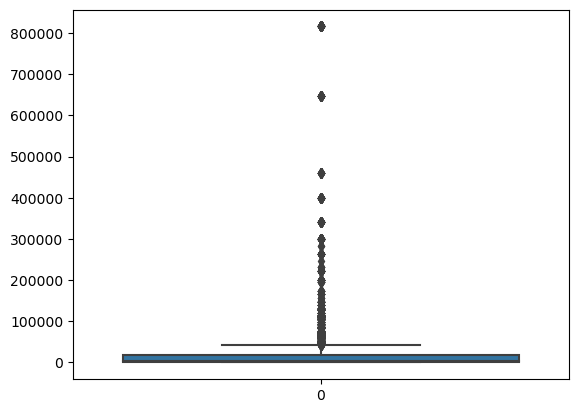

In [288]:
sns.boxplot(data=df['author_followers'])
plt.show()

In [289]:
df['author_followers'].mean()

27980.53801765105

In [290]:
df['author_followers'].median()

4771.0

### 4.rating

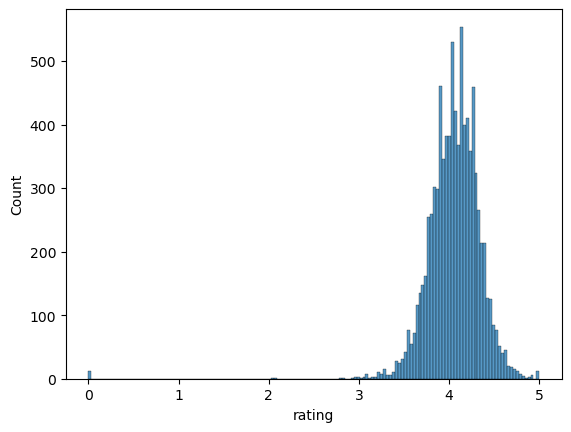

In [291]:
sns.histplot(df['rating'])
plt.show()

#### It's Standard Normal Distribution

### 5.rating_n: How many ratings

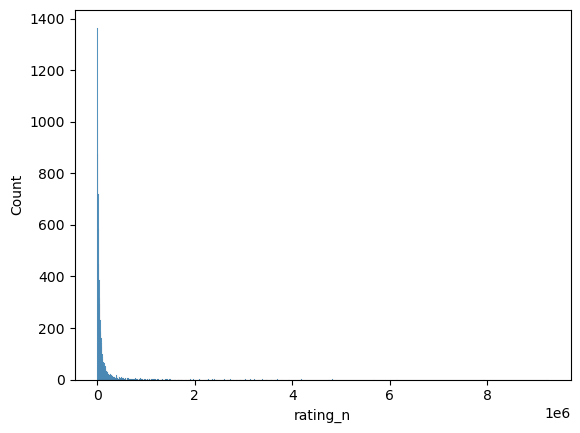

In [292]:
sns.histplot(df['rating_n'])
plt.show()

#### There is a big difference in the number of comments

### 6.review_n:How many reviews

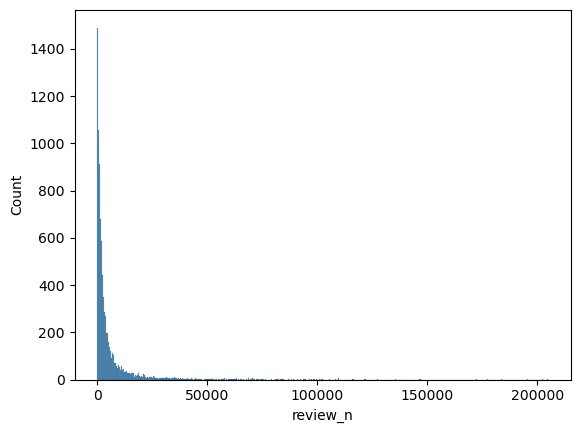

In [293]:
sns.histplot(df['review_n'])
plt.show()

### 7.published_year

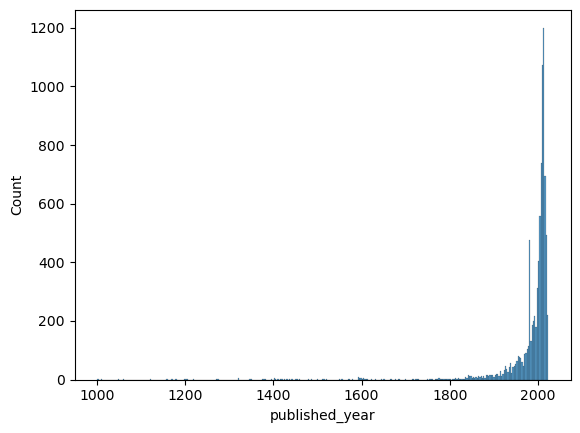

In [294]:
sns.histplot(df['published_year'])
plt.show()

#### 8.pages

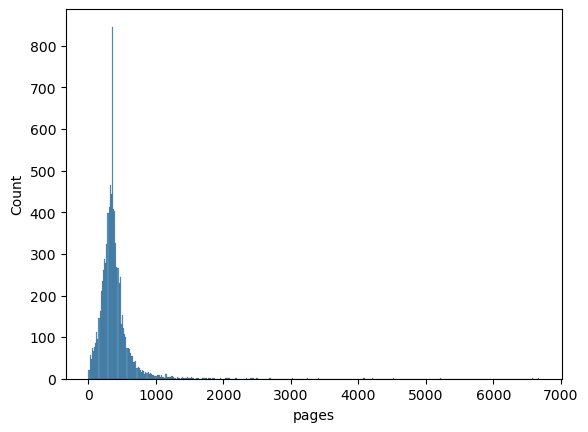

In [295]:
sns.histplot(df['pages'])
plt.show()

### 9.genre

In [296]:
def clean(feature):
    cleaned_feature = list()
    for x in df[feature]:
        if len(x.split(',')) > 1:
            temp = x.split(',')
            for a in temp:
                cleaned_feature.append(a)
        else:
            cleaned_feature.append(x)
    return cleaned_feature

In [297]:
all_genres = clean('genre')

In [298]:
genres = pd.DataFrame(all_genres, columns = ['genres'])
data_genre = pd.DataFrame(genres.value_counts()).reset_index()
data_genre.columns = ['genre', 'counts']
data_genre

,genre,counts
0,Fiction,4938
1,Romance,2232
2,Young Adult,1957
3,Fantasy,1888
4,Contemporary,1706
...,...,...
679,Rwanda,1
680,Ethiopia,1
681,Foodie,1
682,Design,1


<AxesSubplot:xlabel='genres'>

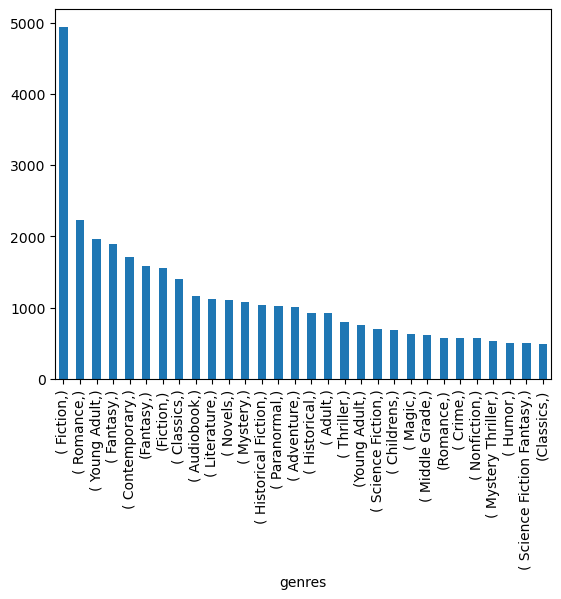

In [299]:
genres.value_counts().head(30).plot.bar()

# Model

#### In general, book reviews can replace sales, so we use rating as a forecast target

In [179]:
df.head()

,title,author,rating,rating_n,review_n,introduction,genre,books_written_n,author_followers,link,...,pages,bookformat,Rank,genre1,genre2,genre3,genre4,genre5,genre6,genre7
0,The Hunger Games,Suzanne Collins,4.33,7938345,195436,"Could you survive on your own in the wild, wit...","Young Adult, Fiction, Dystopia, Fantasy, Scien...",49,93000,https://www.goodreads.com/book/show/2767052-th...,...,374,Hardcover,1,Young Adult,Fiction,Dystopia,Fantasy,Science Fiction,Romance,Adventure
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,3138144,56851,Harry Potter is about to start his fifth year ...,"Fantasy, Young Adult, Fiction, Magic, Children...",562,221000,https://www.goodreads.com/book/show/2.Harry_Po...,...,912,Paperback,2,Fantasy,Young Adult,Fiction,Magic,Childrens,Audiobook,Adventure
2,Pride and Prejudice,Jane Austen,4.28,3930925,99795,"Since its immediate success in 1813, Pride and...","Classics, Fiction, Romance, Historical Fiction...",3939,62100,https://www.goodreads.com/book/show/1885.Pride...,...,279,Paperback,3,Classics,Fiction,Romance,Historical Fiction,Literature,Historical,Audiobook
3,To Kill a Mockingbird,Harper Lee,4.27,5675438,109843,The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,...",69,12900,https://www.goodreads.com/book/show/2657.To_Ki...,...,336,Paperback,4,Classics,Fiction,Historical Fiction,School,Literature,Young Adult,Historical
4,The Book Thief,Markus Zusak,4.39,2357114,135561,Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist...",27,38100,https://www.goodreads.com/book/show/19063.The_...,...,552,Hardcover,5,Historical Fiction,Fiction,Young Adult,Historical,Classics,War,World War II


In [193]:
#X-Y Split, train-test split

X = df.drop(['rating_n','title','author','introduction','genre','link'],axis=1)
y = df['rating_n']

In [194]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

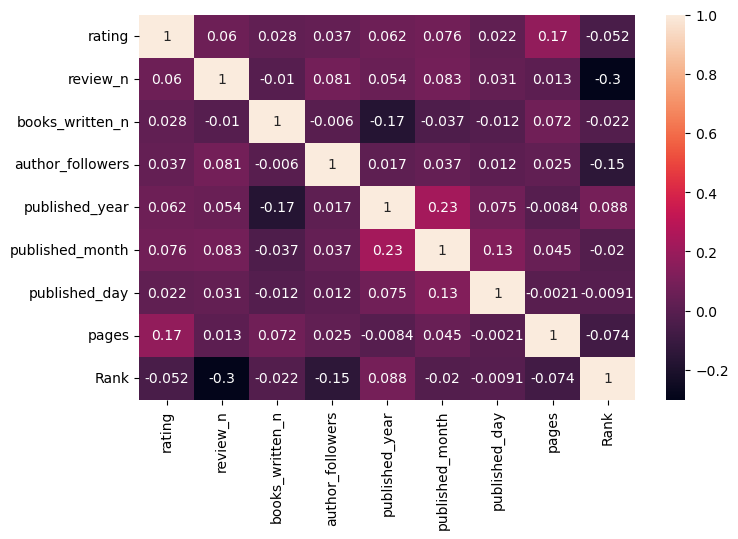

In [195]:
# creating a correlation matrix
correlations_matrix = X_train_num.corr()
# create a heatmap of it
plt.figure(figsize = (8,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### MinMax Scaler

In [196]:
transformer = MinMaxScaler().fit(X_train_num)
# Scaling
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns,index=X_test_num.index)

#### Encode the categorical features using One-Hot Encoding

In [197]:
# Fitting the encoder
encoder = OneHotEncoder(handle_unknown = 'ignore').fit(X_train_cat)
column_name = encoder.get_feature_names_out(X_train_cat.columns)
# Encoding
X_train_hot = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns = column_name, index=X_train_cat.index)
X_test_hot = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns = column_name,index=X_test_cat.index)

In [198]:
X_test = pd.concat([X_test_scaled,X_test_hot], axis = 1)
X_train = pd.concat([X_train_scaled,X_train_hot],axis=1)

#### regression models

In [199]:
def models_automation(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [200]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train, y_train,X_test,y_test)

LinearRegression: Train -> 0.7418525567598859, Test -> -4.5345639373229274e+20
SGDRegressor: Train -> 0.7190745025334047, Test -> 0.6120560350002444
KNeighborsRegressor: Train -> 0.5353896954766282, Test -> 0.2801622440596261
DecisionTreeRegressor: Train -> 1.0, Test -> 0.46228217145921335
RandomForestRegressor: Train -> 0.9770022862862237, Test -> 0.7074867248831885


In [201]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

LR =RandomForestRegressor().fit(X_train, y_train)
pred = LR.predict(X_test)

In [202]:
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = sqrt(mse)

In [203]:
print('R2 Score:', r2)
print('Mean Squared Error:', mse)
print('Mean aboslute Error:', mae)
print('Root Mean Squared Error:',rmse)

R2 Score: 0.7013545923855402
Mean Squared Error: 49522198614.68725
Mean aboslute Error: 37254.94747058823
Root Mean Squared Error: 222535.83669756935


# get more data from kaggle

In [205]:
df1 = pd.read_csv('GoodReads_100k_books.csv')

In [206]:
df1.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [207]:
df1.shape

(100000, 13)

In [208]:
df1.isna().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages               0
rating              0
reviews             0
title               1
totalratings        0
dtype: int64

In [174]:
# 作者在榜单上的书与出版的书做对比,是不是写的书越多，follower也越多
# 评论量与排名做对比